<a href="https://colab.research.google.com/github/mayankbrn/9.7_Delhivery_feature_engineering/blob/MA_working/07_Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Delhivery - Feature Engineering



## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### How can you help here?



The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

### Dataset

Dataset Link: [Delhivery data](https://drive.google.com/file/d/1ZkF2gGCDkjwQgOTGVBpsqhPpSGg1Fybb/view?usp=drive_link)



### Column Profiling

The dataset at the heart of this exploration. Here are some of the key features:

- **data**: tells whether the data is testing or training data.
- **trip_creation_time**: Timestamp of trip creation.
- **route_schedule_uuid**: Unique Id for a particular route schedule.
- **route_type**: Transportation type.
- **FTL**: Full Truck Load - FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way.
- **Carting**: Handling system consisting of small vehicles (carts).
- **trip_uuid**: Unique ID given to a particular trip (A trip may include different source and destination centers).
- **source_center**: Source ID of trip origin.
- **source_name**: Source Name of trip origin.
- **destination_center**: Destination ID.
- **destination_name**: Destination Name.
- **od_start_time**: Trip start time.
- **od_end_time**: Trip end time.
- **start_scan_to_end_scan**: Time taken to deliver from source to destination.
- **is_cutoff**: Unknown field.
- **cutoff_factor**: Unknown field.
- **cutoff_timestamp**: Unknown field.
- **actual_distance_to_destination**: Distance in Kms between source and destination warehouse.
- **actual_time**: Actual time taken to complete the delivery (Cumulative).
- **osrm_time**: An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative).
- **osrm_distance**: An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative).
- **factor**: Unknown field.
- **segment_actual_time**: This is a segment time. Time taken by the subset of the package delivery.
- **segment_osrm_time**: This is the OSRM segment time. Time taken by the subset of the package delivery.
- **segment_osrm_distance**: This is the OSRM distance. Distance covered by the subset of the package delivery.
- **segment_factor**: Unknown field.

### Concepts Used

- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers

### How to begin:

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

#### Hint:


You can use inbuilt functions like `groupby` and aggregations like `sum()`, `cumsum()` to merge some rows based on their
1. `Trip_uuid`, `Source ID` and `Destination ID`
2. Further aggregate on the basis of just `Trip_uuid`. You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.

#### Basic data cleaning and exploration:

- Handle missing values in the data.
- Analyze the structure of the data.
- Try merging the rows using the hint mentioned above.
- Build some features to prepare the data for actual analysis. Extract features from the below fields:
  - **Destination Name**: Split and extract features out of destination. City-place-code (State)
  - **Source Name**: Split and extract features out of destination. City-place-code (State)
  - **Trip_creation_time**: Extract features like month, year and day etc

#### In-depth analysis and feature engineering:

- Calculate the time taken between `od_start_time` and `od_end_time` and keep it as a feature. Drop the original columns, if required
- Compare the difference between Point a. and `start_scan_to_end_scan`. Do hypothesis testing/ Visual analysis to check.
- Do hypothesis testing/ visual analysis between `actual_time` aggregated value and `OSRM time` aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of `trip_uuid`)
- Do hypothesis testing/ visual analysis between `actual_time` aggregated value and `segment actual time` aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of `trip_uuid`)
- Do hypothesis testing/ visual analysis between `osrm distance` aggregated value and `segment osrm distance` aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of `trip_uuid`)
- Do hypothesis testing/ visual analysis between `osrm time` aggregated value and `segment osrm time` aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of `trip_uuid`)
- Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
- Handle the outliers using the **IQR method**.
- Do one-hot encoding of categorical variables (like `route_type`)
- Normalize/ Standardize the numerical features using `MinMaxScaler` or `StandardScaler`.

### Evaluation Criteria (100 Points):


- Define Problem Statement and Perform Exploratory Data Analysis (10 points)

  - **Definition of Problem** (as per given problem statement with additional views)
  - **Observations** on:
    - Shape of data
    - Data types of all the attributes
    - Conversion of categorical attributes to 'category' (if required)
    - Missing value detection
    - Statistical summary
  - **Visual Analysis**:
    - Distribution plots of all the continuous variable(s)
    - Boxplots of all the categorical variables
  - **Insights** based on EDA
  - **Comments** on:
    - Range of attributes
    - Outliers of various attributes
    - Distribution of the variables and relationship between them
  - **Comments** for each univariate and bivariate plot

- Feature Creation (10 Points)
- Merging of Rows and Aggregation of Fields (10 Points)
- Comparison & Visualization of Time and Distance Fields (10 Points)
- Missing Values Treatment & Outlier Treatment (10 Points)
- Checking Relationship Between Aggregated Fields (10 Points)
- Handling Categorical Values (10 Points)
- Column Normalization / Column Standardization (10 Points)

- Business Insights (10 Points):
  Should include patterns observed in the data along with what you can infer from it. Examples:
  - Check from where most orders are coming from (State, Corridor, etc.)
  - Busiest corridor, average distance between them, average time taken

- Recommendations (10 Points)
  Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

## Solution

### Basic data cleaning and exploration:

In [659]:
#importing the relevent libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [660]:
#importing the csv file from google drive
!gdown 1ZkF2gGCDkjwQgOTGVBpsqhPpSGg1Fybb

Downloading...
From: https://drive.google.com/uc?id=1ZkF2gGCDkjwQgOTGVBpsqhPpSGg1Fybb
To: /content/07_delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 118MB/s]


In [661]:
#load the csv into dataframe
df = pd.read_csv('07_delhivery_data.csv')

In [662]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


#### Dropping the unknown columns

In [663]:
# all the columns which are marked as unknown in the column profiling we can remove them

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(unknown_fields, axis = 1, inplace = True)

We can see that time is considered as object and float in no of columns

In [664]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


#### Analyzing the structure of data

In [665]:
#checking Null values in the columns
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


'Source name' and 'Destination name' have some missing values.

In [666]:
#unique values in the columns
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [667]:
# statistical summary of data - Numercial columns
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [668]:
#statistical summary of data - categorical columns
df.describe(include = object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81


In [669]:
#shape of data
df.shape

(144867, 19)

There are 19 columns and 144867 rows in the dataset.

In [670]:
#checking the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

#### Changing he datatype of columns

In [671]:
#converting the data and route_type as categorical columns

df["data"] = df["data"].astype("category")
df["route_type"] = df["route_type"].astype("category")

In [672]:
# There are few columns which represent time but they in object datatype format those can be convereted to datetime column

datetype_column = ['trip_creation_time', 'od_start_time', 'od_end_time']

for i in datetype_column:
  df[i] = pd.to_datetime(df[i]) #passing the column one by one in the for loop

In [673]:
#checking the column datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

#### Handling missing values

In [674]:
# checking for the source_center  for which source_name is null

center_for_missing_source_name = df[df['source_name'].isna()]['source_center'].unique()
center_for_missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

This give us all the source_center names for which source_name is not available.
Let's check if these source_center name is having source_name

In [675]:
# Checking if we can get the source_name for above source_centers from other rows in the data
# In short, it's selecting rows where "source_name" has a value, but the "source_center" is associated with some other rows where "source_name" is missing (null).

df[(df['source_name'].notnull()) & (df['source_center'].isin(df[df['source_name'].isnull()]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


It means that source_name for missing values is not available in other rows as well.

In [676]:
#checking for destination_center for which destination_name is null
center_for_missing_destination_name = df[df['destination_name'].isna()]['destination_center'].unique()
center_for_missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [677]:
# Checking if we can get the destintion_name for above destinatio_centers from other rows in the data
# In short, it's selecting rows where "destination_name" has a value, but the "destination_center" is associated with some other rows where "destination_name" is missing (null).

df[(df['destination_name'].notnull()) & (df['destination_center'].isin(df[df['destination_name'].isnull()]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


#### Removing incorrect data

It means that destination_name for missing values is not available in other rows as well.

In [678]:
# We can see from the describe that the values of segment actual time is negative, which can't be true so lets drop that data
df.drop(df[df['segment_actual_time']<0].index, inplace = True)

In [679]:
#now checking the describe data
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144846,144846,144846,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000
mean,2018-09-22 13:34:27.259366400,2018-09-22 18:02:50.434589952,2018-09-23 10:04:33.787580160,961.226537,234.057171,416.908724,213.853002,284.750969,36.207427,18.507304,22.828528
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,0.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.354927,51.000000,27.000000,29.909925,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:52:50.639791104,2018-09-23 03:13:03.520212992,449.000000,66.126234,132.000000,64.000000,78.524600,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.706673,513.000000,257.000000,343.062075,40.000000,22.000000,27.812975
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1036.993595,344.974984,598.085058,307.997702,421.101831,53.561259,14.775870,17.860268


In [680]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


Now negative values of negative segment time are removed.

#### Merging rows and aggregaion of data

In [681]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


##### Merging row based on trip_uuid, source center and destination center as df1

In [682]:
# name of columns for aggregation
group_by_columns = ['trip_uuid', 'source_center', 'destination_center']

df1 = df.groupby(by = group_by_columns, as_index= False ).agg(
                                                                  {
                                                                      'data' : 'first',
                                                                      'trip_creation_time' : 'first',
                                                                      'route_type': 'first',
                                                                      'source_name' : 'first',
                                                                      'destination_name' : 'last',
                                                                      'od_start_time' : 'first',
                                                                      'od_end_time' : 'first',
                                                                      'start_scan_to_end_scan' : 'first',
                                                                      'actual_distance_to_destination' : 'last', #cumulative distance so using the last for taking end value
                                                                      'actual_time' : 'last', #cumulative time for trip till that point so using last for end value
                                                                      'osrm_time' : 'last', #cumualative time
                                                                      'osrm_distance' : 'last', #cumulative distance so taking last
                                                                      'segment_actual_time' : 'sum', #segment time so doing summation
                                                                      'segment_osrm_time' : 'sum', #segment time so doing the sum for whole trip
                                                                      'segment_osrm_distance' : 'sum' #segment distance so doing the summation


                                                                  }
                                                              )
df1.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


#### Adding the od_total_time

Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [683]:
#calculating the total trip time
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']

#dropping the original columns from the dataframe
df1.drop(['od_start_time', 'od_end_time'], inplace = True, axis = 1)

#convert the total time into seconds
df1['od_total_time'] = ((df1['od_total_time'].dt.total_seconds())/ 60).round(2)

df1.head(2) #check the value in new column for total trip time

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51


##### Merging row based on trip_uuid as df2

In [684]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum', #now doing sum after first aggregation at df1, similar for below
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


### Feature Generation

#### Extract state, City and Place from Source & Destination

In [685]:
("Kanpur_Central_H_6 (Uttar Pradesh)").split('_')

['Kanpur', 'Central', 'H', '6 (Uttar Pradesh)']

In [686]:
("Kanpur_Central_H_6 (Uttar Pradesh)").split('_')[0] #city

'Kanpur'

In [687]:
("Kanpur_Central_H_6 (Uttar Pradesh)").split('_')[1] #place

'Central'

In [688]:
("Kanpur_Central_H_6 (Uttar Pradesh)").split('(')[1]

'Uttar Pradesh)'

In [689]:
("Kanpur_Central_H_6 (Uttar Pradesh)").split('(')[1][:-1]  #state

'Uttar Pradesh'

In [690]:
#we will be using the df2 dataframe that is been grouped at trip_uuid level

# Extracting state, city and place name from source_name column value e.g. Kanpur_Central_H_6 (Uttar Pradesh)

# Source Name: Split and extract features out of destination. City-place-code (State)
df2['source_state'] = df2['source_name'].apply(lambda x : str(x).split('(')[1][:-1] if '(' in str(x) else None) #state
df2['source_city'] = df2['source_name'].apply(lambda x : str(x).split('_')[0]) #city
#df2['source_place'] = df2['source_name'].apply(lambda x : str(x).split('_')[1]) #place

# Destination Name: Split and extract features out of destination. City-place-code (State)
df2['destination_state'] = df2['destination_name'].apply(lambda x : str(x).split('(')[1][:-1] if '(' in str(x) else None) #state
df2['destination_city'] = df2['destination_name'].apply(lambda x : str(x).split('_')[0]) #city
#df2['destination_place'] = df2['destination_name'].apply(lambda x : str(x).split('_')[1]) #place

df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Uttar Pradesh,Kanpur
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,143.0,68.0,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,Karnataka,Doddablpur
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Haryana,Gurgaon
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,59.0,15.0,19.6800,59.0,16.0,19.8766,Maharashtra,Mumbai Hub (Maharashtra),Maharashtra,Mumbai
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,341.0,117.0,146.7918,340.0,115.0,146.7919,Karnataka,Bellary,Karnataka,Sandur


In [691]:
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       None], dtype=object)

In [692]:
df2['destination_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura', None,
       'Daman & Diu'], dtype=object)

State names for source and destination looks good

In [693]:
df2['source_city'].unique()[:50]

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai Hub (Maharashtra)',
       'Bellary', 'Chennai', 'HBR Layout PC (Karnataka)', 'Surat',
       'Delhi', 'Pune', 'FBD', 'Shirala', 'Hyderabad', 'Thirumalagiri',
       'Gulbarga', 'Jaipur', 'Allahabad', 'Guwahati', 'Narsinghpur',
       'Shrirampur', 'Hoogly', 'Madakasira', 'Sonari', 'Bengaluru',
       'Dindigul', 'Jalandhar', 'Faridabad', 'Chandigarh', 'Deoli',
       'Pandharpur', 'CCU', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore'], dtype=object)

In [694]:
df2['destination_city'].unique()[:50]

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Sandur', 'Chennai',
       'HBR Layout PC (Karnataka)', 'Surat', 'Delhi',
       'PNQ Rahatani DPC (Maharashtra)', 'Faridabad (Haryana)',
       'Ratnagiri', 'Bangalore', 'Hyderabad', 'Aland', 'Jaipur', 'Satna',
       'Janakpuri (Delhi)', 'Guwahati', 'Bareli', 'Nashik', 'Hooghly',
       'Puttaprthi', 'Sivasagar', 'Bengaluru', 'Palani', 'Jalandhar',
       'Chandigarh', 'Yavatmal', 'Sangola', 'Kolkata', 'Savner',
       'Kurnool', 'FBD', 'Bhatinda', 'Bhiwandi', 'Barnala', 'Murbad',
       'Kadaba', 'Gulbarga', 'Naraingarh', 'Ludhiana', 'Kadi', 'Jabalpur',
       'MAA', 'Gangakher', 'Bankura', 'Silvassa', 'Porbandar', 'Jetpur'],
      dtype=object)

With the city name there is some problem, at some places name of state is added with it.

In [695]:
df2['source_city'] = df2['source_city'].apply(lambda x : str(x).split()[0])
df2['destination_city'] = df2['destination_city'].apply(lambda x : str(x).split()[0])
df2.sample(10)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city
4955,trip-153730452495634025,IND133004AAA,IND173025AAA,training,FTL,2018-09-18 21:02:04.956727,Ambala (Haryana),PaontSahib_Gurudwar_D (Himachal Pradesh),286.74,285.0,...,190.0,99.0,114.3535,189.0,97.0,114.3535,Haryana,Ambala,Himachal Pradesh,PaontSahib
4670,trip-153727208237059507,IND421302AAG,IND400072AAA,training,Carting,2018-09-18 12:01:22.370868,Bhiwandi_Mankoli_HB (Maharashtra),Mumbai_Tejpal_M (Maharashtra),414.34,414.0,...,56.0,23.0,27.8402,55.0,22.0,27.8402,Maharashtra,Bhiwandi,Maharashtra,Mumbai
9108,trip-153782206940956016,IND781018AAB,IND110037AAM,training,FTL,2018-09-24 20:47:49.409796,Guwahati_Hub (Assam),Delhi_Airport_H (Delhi),3591.33,3591.0,...,3318.0,1323.0,1808.3437,3286.0,1735.0,2390.3753,Assam,Guwahati,Delhi,Delhi
12438,trip-153825732553081012,IND562132AAA,IND560300AAA,test,Carting,2018-09-29 21:42:05.531156,Bangalore_Nelmngla_H (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),184.08,184.0,...,75.0,47.0,37.2958,75.0,43.0,42.1410,Karnataka,Bangalore,Karnataka,Bengaluru
13596,trip-153843684441391753,IND206001AAA,IND209304AAA,test,FTL,2018-10-01 23:34:04.414156,Etawah_MhraChng_D (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2223.40,2223.0,...,1401.0,742.0,1026.4320,1382.0,1116.0,1433.7158,Uttar Pradesh,Etawah,Uttar Pradesh,Kanpur
12424,trip-153825628910775427,IND621802AAA,IND621212AAA,test,FTL,2018-09-29 21:24:49.108005,Jayamkondan_Chithbrm_D (Tamil Nadu),Perambalur_goplpurm_D (Tamil Nadu),141.11,141.0,...,102.0,51.0,68.2472,100.0,70.0,80.5558,Tamil Nadu,Jayamkondan,Tamil Nadu,Perambalur
484,trip-153677495458100709,IND123001AAA,IND301705AAA,training,FTL,2018-09-12 17:55:54.581249,Narnaul_DC (Haryana),Neemrana_Rcocmplx_D (Rajasthan),437.75,436.0,...,354.0,133.0,152.6902,351.0,134.0,150.7045,Haryana,Narnaul,Rajasthan,Neemrana
8779,trip-153777100142247643,IND140301AAA,IND160055AAA,training,Carting,2018-09-24 06:36:41.422722,Chandigarh_Kharar_DC (Chandigarh),Chandigarh_Mohali (Chandigarh),297.60,296.0,...,245.0,105.0,107.7204,240.0,109.0,99.1627,Chandigarh,Chandigarh,Chandigarh,Chandigarh
3045,trip-153706096799967540,IND110044AAB,IND110037AAM,training,Carting,2018-09-16 01:22:47.999934,Del_Okhla_PC (Delhi),Delhi_Airport_H (Delhi),66.77,66.0,...,40.0,23.0,24.6860,39.0,22.0,24.6860,Delhi,Del,Delhi,Delhi
13184,trip-153836846785521663,IND562132AAA,IND560083AAB,test,Carting,2018-10-01 04:34:27.855442,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bnnrghta_L (Karnataka),219.05,219.0,...,50.0,38.0,40.8194,49.0,38.0,38.6834,Karnataka,Bangalore,Karnataka,Bengaluru


Now the city data is also clean. So we are good for some EDA analysis.

#### Extract Date, year, month, day, hour and week from trip creation time

In [696]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14807 non-null  object        
 7   destination_name                14809 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [697]:
# since 'trip_creation_time' is already a datetime column so we don't need to use the pd.to_datetime here again.

df2['trip_creation_date'] = df2['trip_creation_time'].dt.date
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year.astype('int16')
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month.astype('int8')
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day.astype('int8')
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week.astype('int8')
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour.astype('int8')

df2.sample(5)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,source_state,source_city,destination_state,destination_city,trip_creation_date,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour
11487,trip-153811654645222721,IND121004AAB,IND110037AAM,test,Carting,2018-09-28 06:35:46.452461,FBD_Balabhgarh_DPC (Haryana),Delhi_Airport_H (Delhi),115.81,115.0,...,Haryana,FBD,Delhi,Delhi,2018-09-28,2018,9,28,39,6
81,trip-153671742249756615,IND000000ACB,IND821115AAB,training,FTL,2018-09-12 01:57:02.497819,Gurgaon_Bilaspur_HB (Haryana),Sasaram_Central_I_2 (Bihar),1390.34,1390.0,...,Haryana,Gurgaon,Bihar,Sasaram,2018-09-12,2018,9,12,37,1
14463,trip-153857380602727856,IND395023AAA,IND110037AAM,test,FTL,2018-10-03 13:36:46.027521,Surat_HUB (Gujarat),Delhi_Airport_H (Delhi),1948.77,1948.0,...,Gujarat,Surat,Delhi,Delhi,2018-10-03,2018,10,3,40,13
9912,trip-153791615219604992,IND110044AAB,IND000000ACB,training,Carting,2018-09-25 22:55:52.196303,Del_Okhla_PC (Delhi),Gurgaon_Bilaspur_HB (Haryana),171.43,171.0,...,Delhi,Del,Haryana,Gurgaon,2018-09-25,2018,9,25,39,22
13284,trip-153838955589967057,IND591102AAA,IND580030AAA,test,FTL,2018-10-01 10:25:55.899929,Bailhongal_NamoNagr_D (Karnataka),Hubli_Dc (Karnataka),343.34,342.0,...,Karnataka,Bailhongal,Karnataka,Hubli,2018-10-01,2018,10,1,40,10


In [698]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14817,2018-09-22 12:44:19.555167744,2018-09-12 00:00:16.535741,2018-09-17 02:51:25.129125888,2018-09-22 04:02:35.066945024,2018-09-27 19:37:41.898427904,2018-10-03 23:59:42.701692,NaN
od_total_time,14817.0,531.69763,23.46,149.93,280.77,638.2,7898.55,658.868223
start_scan_to_end_scan,14817.0,530.810016,23.0,149.0,280.0,637.0,7898.0,658.705957
actual_distance_to_destination,14817.0,164.477838,9.002461,22.837239,48.474072,164.583208,2186.531787,305.388147
actual_time,14817.0,357.143754,9.0,67.0,149.0,370.0,6265.0,561.396157
osrm_time,14817.0,161.384018,6.0,29.0,60.0,168.0,2032.0,271.360995
osrm_distance,14817.0,204.344689,9.0729,30.8192,65.6188,208.475,2840.081,370.395573
segment_actual_time,14817.0,353.95161,9.0,66.0,147.0,367.0,6230.0,556.320988
segment_osrm_time,14817.0,180.921172,6.0,31.0,65.0,185.0,2564.0,314.485624
segment_osrm_distance,14817.0,223.164,9.0729,32.6545,70.1544,218.7102,3523.6324,416.547252


In [699]:
df2.describe(include = 'object').T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14807,933,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14809,1034,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14807,29,Maharashtra,2714
source_city,14817,717,Gurgaon,1139
destination_state,14809,31,Maharashtra,2561
destination_city,14817,841,Mumbai,1202
trip_creation_date,14817,22,2018-09-18,791


### Univariate Analysis

#### Top-10 Source states

In [700]:
top_source_states = df2['source_state'].value_counts(normalize = True).head(10)* 100
top_source_states

,proportion
source_state,
Maharashtra,18.329169
Karnataka,14.472884
Haryana,12.413048
Tamil Nadu,7.016951
Telangana,5.301547
Uttar Pradesh,5.146215
Gujarat,5.065172
Delhi,4.916594
West Bengal,4.491119


<ipython-input-701-8dcee287d63c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_source_states.index, y = top_source_states.values, palette='Greens_r')


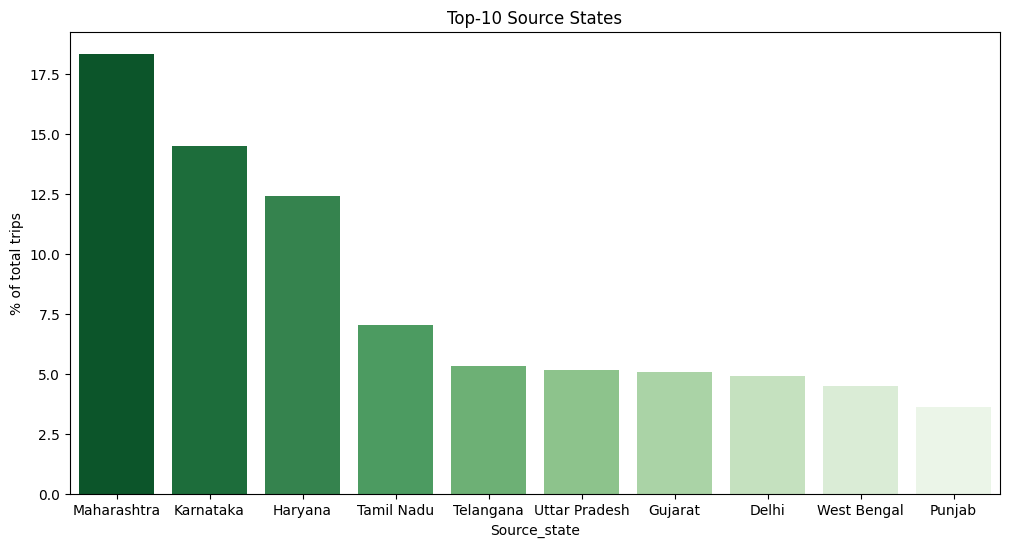

In [701]:
#creating a bar plot for count of trips by source states
plt.figure(figsize = (12, 6))
sns.barplot(x = top_source_states.index, y = top_source_states.values, palette='Greens_r')
plt.xlabel('Source_state')
plt.ylabel('% of total trips')
plt.title('Top-10 Source States')
plt.show()

#### Top-10 Destination States

In [702]:
#getting top-10 states and their counts
top_destination_states = df2['destination_state'].value_counts(normalize = True).head(10) * 100
top_destination_states

,proportion
destination_state,
Maharashtra,17.293538
Karnataka,15.497333
Haryana,11.094605
Tamil Nadu,7.319873
Uttar Pradesh,5.530421
Telangana,5.294078
Gujarat,4.956445
West Bengal,4.706597
Delhi,4.409481


<ipython-input-703-f071c97f940b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_destination_states.index, y = top_destination_states.values, palette='Blues_r')


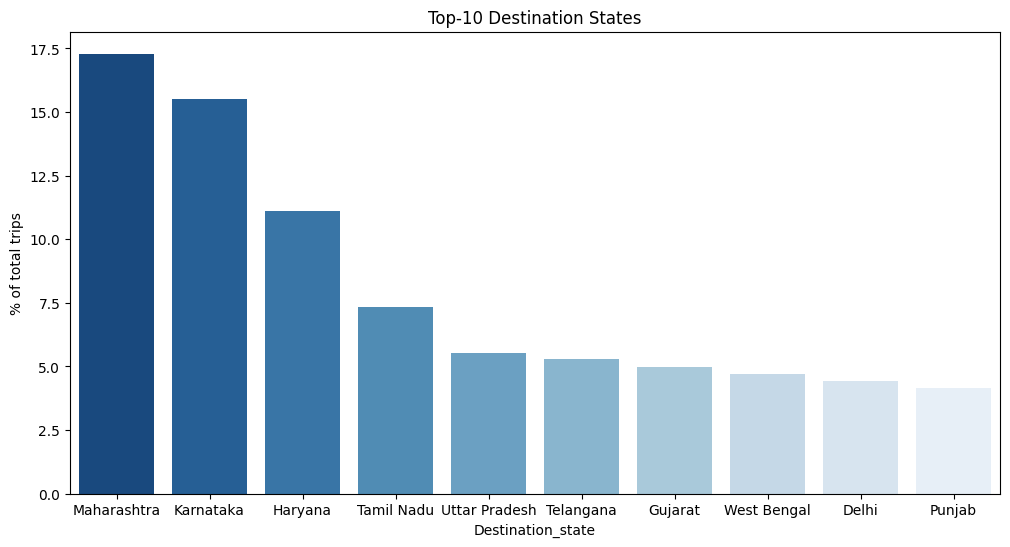

In [703]:
#creating a bar plot for count of trips by source states
plt.figure(figsize = (12, 6))
sns.barplot(x = top_destination_states.index, y = top_destination_states.values, palette='Blues_r')
plt.xlabel('Destination_state')
plt.ylabel('% of total trips')
plt.title('Top-10 Destination States')
plt.show()

#### Top-10 Source Cities

In [704]:
#getting top-10 cities and their counts
top_source_cities = df2['source_city'].value_counts(normalize = True).head(10)*100
top_source_cities

,proportion
source_city,
Gurgaon,7.687116
Bengaluru,7.099953
Mumbai,6.533036
Bhiwandi,4.704056
Bangalore,4.373355
Delhi,3.718701
Hyderabad,3.475737
Pune,3.239522
Chennai,2.281164


<ipython-input-705-332a90d37220>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_source_cities.index, y = top_source_cities.values, palette='Greens_r')


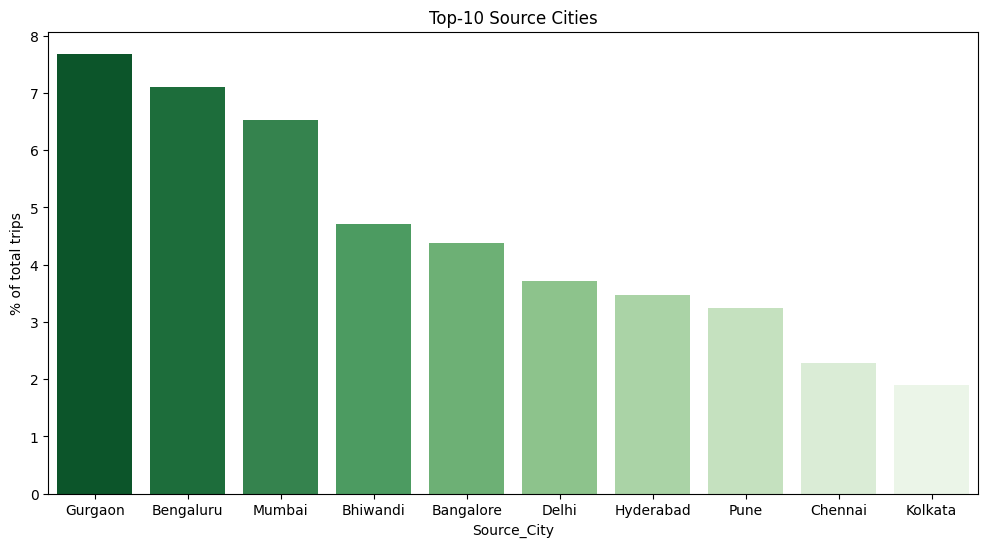

In [705]:
#creating a bar plot for count of trips by source states
plt.figure(figsize = (12, 6))
sns.barplot(x = top_source_cities.index, y = top_source_cities.values, palette='Greens_r')
plt.xlabel('Source_City')
plt.ylabel('% of total trips')
plt.title('Top-10 Source Cities')
plt.show()

#### Top-10 Destination cities

In [706]:
#getting top-10 cities and their counts
top_destination_cities = df2['destination_city'].value_counts(normalize = True).head(10)*100
top_destination_cities

,proportion
destination_city,
Mumbai,8.112303
Bengaluru,7.342917
Gurgaon,5.918877
Bangalore,3.718701
Delhi,3.711952
Hyderabad,3.367753
Bhiwandi,2.929068
Chennai,2.767092
Chandigarh,2.287913


<ipython-input-707-f6465f6a1d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_destination_cities.index, y = top_destination_cities.values, palette='Greens_r')


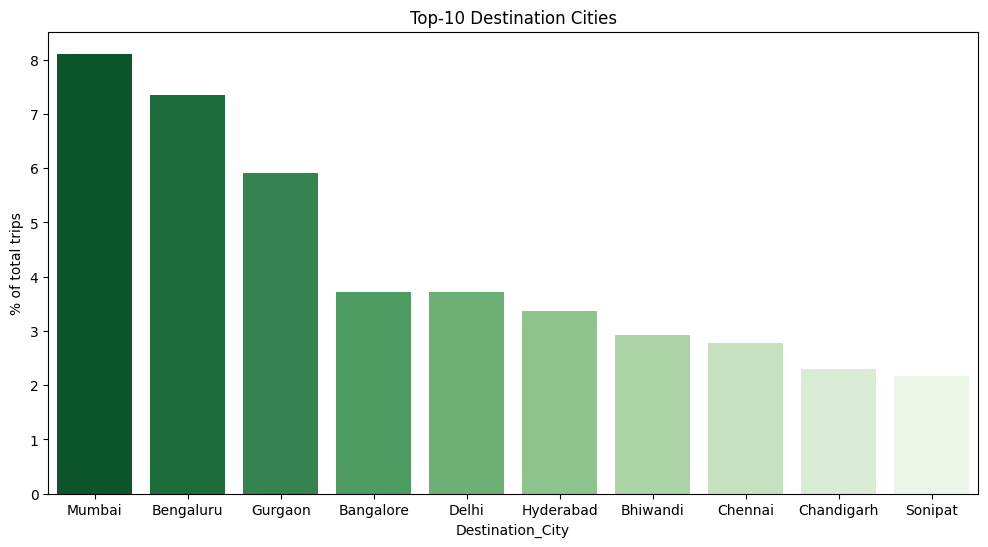

In [707]:
#creating a bar plot for count of trips by source states
plt.figure(figsize = (12, 6))
sns.barplot(x = top_destination_cities.index, y = top_destination_cities.values, palette='Greens_r')
plt.xlabel('Destination_City')
plt.ylabel('% of total trips')
plt.title('Top-10 Destination Cities')
plt.show()

#### Trip count by hour of trip creation time

In [708]:
#getting the count of trips by hour its booked
hourly_count = df2['trip_creation_hour'].value_counts(normalize = True).sort_index()*100
#displaying the sorted hourly trip count
hourly_count.head()

,proportion
trip_creation_hour,
0,6.708510
1,5.061753
2,4.737801
3,4.400351
4,4.292367


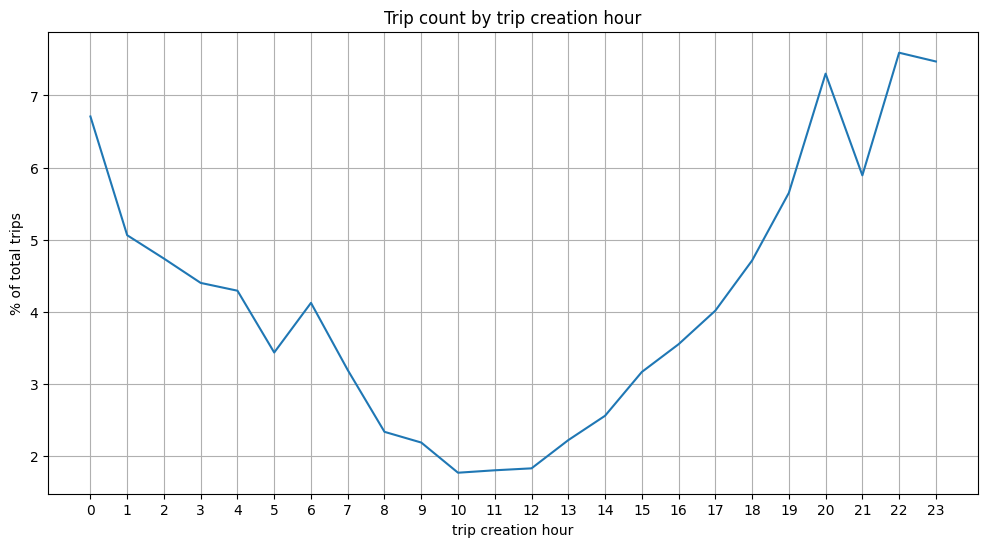

In [709]:
#creating a line plot for count of trips
plt.figure(figsize = (12, 6))
sns.lineplot(x = hourly_count.index, y = hourly_count.values)
plt.xlabel('trip creation hour')
plt.ylabel('% of total trips')
plt.title('Trip count by trip creation hour')
plt.xticks(np.arange(0, 24))
plt.grid('x')
plt.show()

Most of the trips starts after 12 PM and peaks around 7-11 PM and then start declining.

#### Trip count by day of the month

In [710]:
#getting the count of trips by hour its booked
day_count = df2['trip_creation_day'].value_counts(normalize = True).sort_index()*100
day_count.head()

,proportion
trip_creation_day,
1,4.083148
2,3.725450
3,4.258622
12,5.041506
13,5.061753


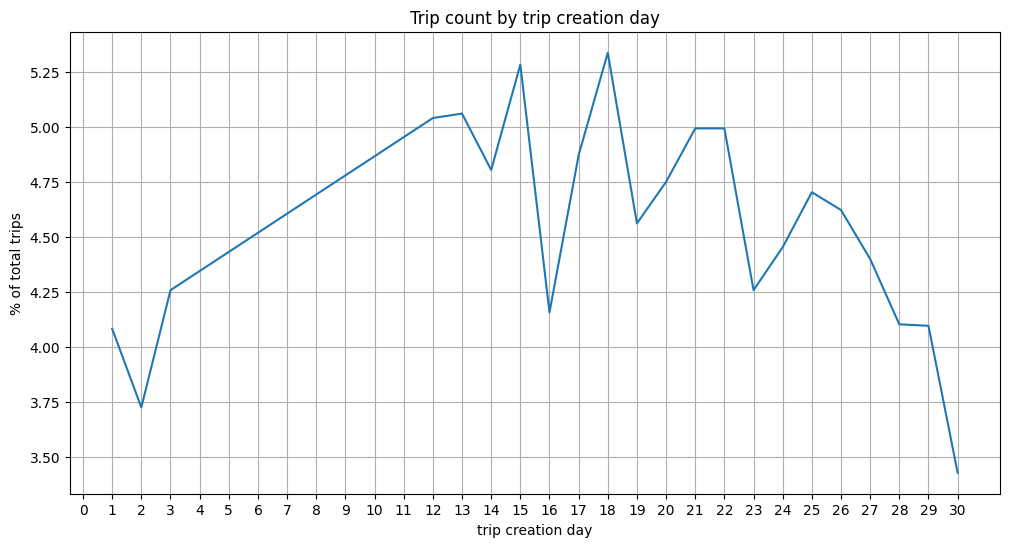

In [711]:
#creating a line plot for count of trips
plt.figure(figsize = (12, 6))
sns.lineplot(x = day_count.index, y = day_count.values)
plt.xlabel('trip creation day')
plt.ylabel('% of total trips')
plt.title('Trip count by trip creation day')
plt.xticks(np.arange(0, 31))
plt.grid('x')
plt.show()

trips booking picks up at the start of the months, peaks in middle and again start declining in %

#### Trip count by month of year

In [712]:
#getting the count of trips by hour its booked
month_count = df2['trip_creation_month'].value_counts().sort_index()
month_count

,count
trip_creation_month,
9,13029
10,1788


Seems like we have limited data for these two months.

#### Trip count by year

In [713]:
#getting the count of trips by hour its booked
year_count = df2['trip_creation_year'].value_counts().sort_index()
year_count

,count
trip_creation_year,
2018,14817


Most of the data belongs to 2018.

#### Distribution of trip data testing/ training

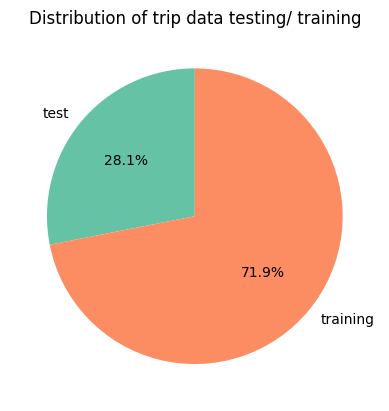

In [714]:
#getting the count of trips by data type
data_count = df2['data'].value_counts().sort_index()

plt.pie(data_count, labels = data_count.index, autopct = '%.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of trip data testing/ training')
plt.show()

#### Distribution of trip data by route type

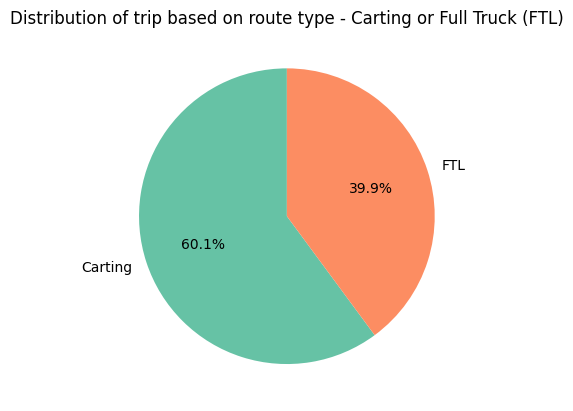

In [715]:
#getting the count of trips by data type
route_type_count = df2['route_type'].value_counts().sort_index()

plt.pie(route_type_count, labels = route_type_count.index, autopct = '%.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of trip based on route type - Carting or Full Truck (FTL)')
plt.show()

#### Distribution of inter and intra state trips

In [716]:
#creating a column for inter/intra state trip
df2['trip_type'] = np.where(df2['source_state'] == df2['destination_state'], 'Intra-state', 'Inter-state')

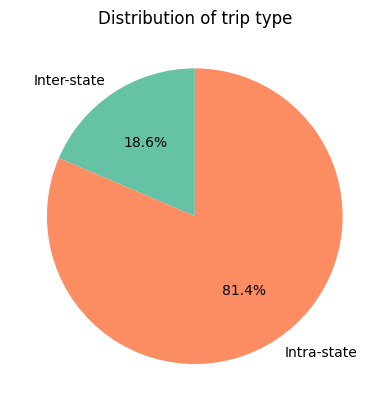

In [717]:
#getting the count of trips by data type
trip_type_count = df2['trip_type'].value_counts().sort_index()

plt.pie(trip_type_count, labels = trip_type_count.index, autopct = '%.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of trip type')
plt.show()

81% of the trips start and end in different state.

#### Top-10 states with Intra-state trips

In [718]:
#getting top-10 based on destination states
top_intra_state = df2[df2['trip_type'] == 'Intra-state']['destination_state'].value_counts(normalize = True).head(10)*100
top_intra_state

,proportion
destination_state,
Maharashtra,20.329852
Karnataka,17.047903
Tamil Nadu,8.461793
Haryana,7.865075
Telangana,5.710260
Gujarat,5.212995
West Bengal,5.096967
Uttar Pradesh,4.947787
Rajasthan,3.754351


Mumbai & Karnataka contributes to more than 37% intra-state trip start and end.

<ipython-input-719-642847101d14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_intra_state.index, y = top_intra_state.values, palette='Greens_r')


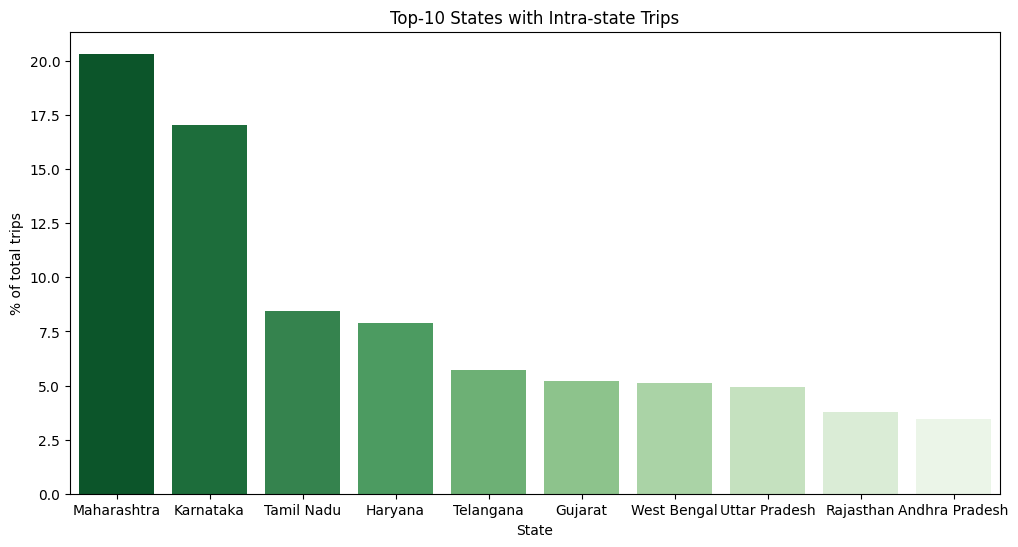

In [719]:
#creating a bar plot for count of trips by source states
plt.figure(figsize = (12, 6))
sns.barplot(x = top_intra_state.index, y = top_intra_state.values, palette='Greens_r')
plt.xlabel('State')
plt.ylabel('% of total trips')
plt.title('Top-10 States with Intra-state Trips')
plt.show()

#### #### Top-10 states with Inter-state trips

In [720]:
#getting top-10 destination states based on destination states
top_inter_destination_source = df2[df2['trip_type'] == 'Inter-state']['destination_state'].value_counts(normalize = True).head(10)*100
top_inter_destination_source

,proportion
destination_state,
Haryana,25.300766
Delhi,16.296026
Karnataka,8.676631
Uttar Pradesh,8.093328
Punjab,7.619395
Maharashtra,3.937295
Gujarat,3.827926
Rajasthan,3.536274
Telangana,3.463361


Haryana and Delhi tops the list with destination states for inter-state trips as well.

In [721]:
#getting top-10 source states based on destination states
top_inter_source_source = df2[df2['trip_type'] == 'Inter-state']['source_state'].value_counts(normalize = True).head(10)*100
top_inter_source_source

,proportion
source_state,
Haryana,32.433418
Delhi,19.044144
Maharashtra,9.522072
Uttar Pradesh,6.019701
Punjab,4.669829
Gujarat,4.414447
Telangana,3.502371
Karnataka,3.137541
Chandigarh,2.699745


Haryana & Delhi leads source in the Inter-state trips, its an indication of major wareshoue situated there incase of this data is for e-commerce trips so that more 50% trips starts from there.

<ipython-input-722-edf727e6ae88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_inter_source_source.index, y = top_inter_source_source.values, palette='Greens_r')


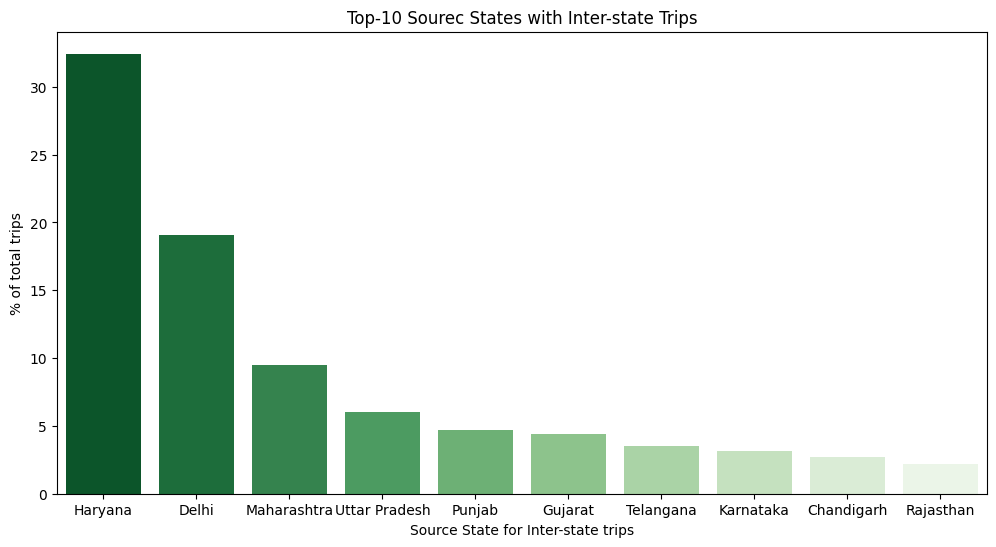

In [722]:
#creating a bar plot for count of trips by source states
plt.figure(figsize = (12, 6))
sns.barplot(x = top_inter_source_source.index, y = top_inter_source_source.values, palette='Greens_r')
plt.xlabel('Source State for Inter-state trips')
plt.ylabel('% of total trips')
plt.title('Top-10 Sourec States with Inter-state Trips')
plt.show()

### Bi-variate/ Multivariate Analysis

#### Corelation matrix

In [723]:
correlation_matrix = df2.corr(numeric_only=True) #only for numeric columns
correlation_matrix

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961098,0.918510,0.919220,NaN,-0.000677,0.007311,0.006134,0.035781
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961151,0.918581,0.919313,NaN,-0.000676,0.007303,0.006122,0.035723
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952829,0.987530,0.993054,NaN,-0.004289,0.004321,-0.002246,0.020800
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999976,0.953886,0.956982,NaN,-0.006265,0.007191,-0.001533,0.012795
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957771,0.993260,0.991609,NaN,-0.006653,0.005034,-0.004816,0.026356
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958357,0.991797,0.994709,NaN,-0.004961,0.004840,-0.002587,0.022958
segment_actual_time,0.961098,0.961151,0.952829,0.999976,0.957771,0.958357,1.000000,0.953055,0.956118,NaN,-0.006196,0.007152,-0.001462,0.012727
segment_osrm_time,0.918510,0.918581,0.987530,0.953886,0.993260,0.991797,0.953055,1.000000,0.996091,NaN,-0.004651,0.005166,-0.001888,0.020729
segment_osrm_distance,0.919220,0.919313,0.993054,0.956982,0.991609,0.994709,0.956118,0.996091,1.000000,NaN,-0.003268,0.004743,-0.000335,0.018003
trip_creation_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Not very clear by looking at correlation matrix, let's draw heatmap to get visual clariy

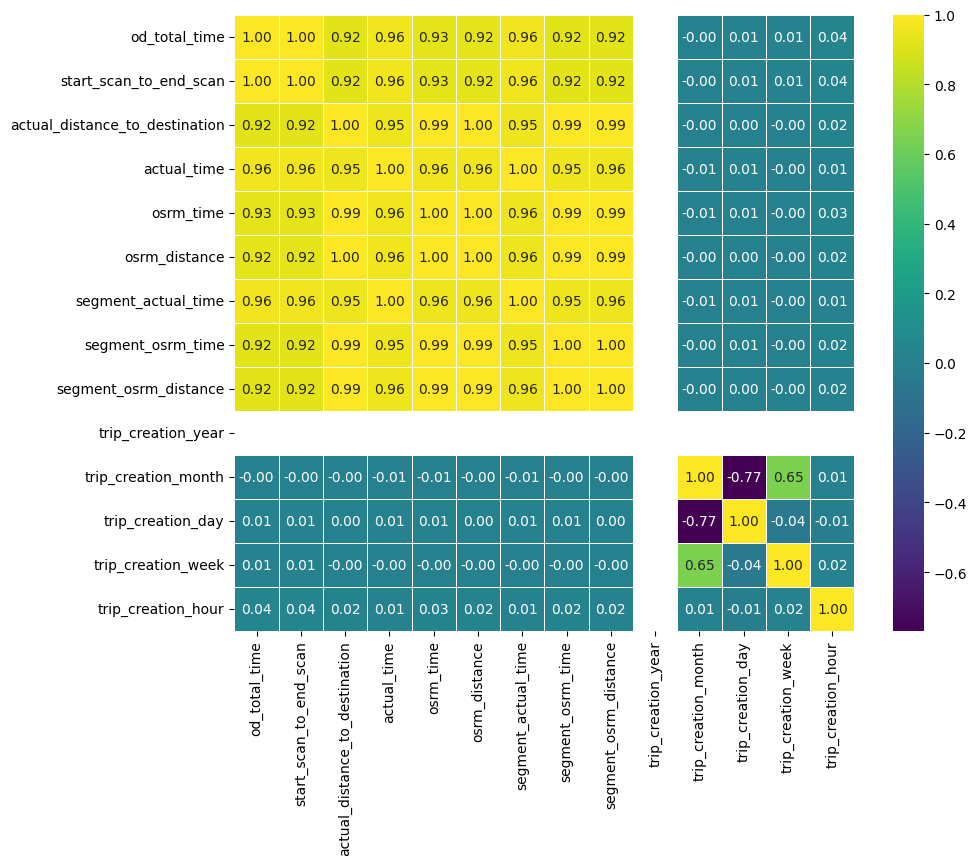

In [724]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.show()

There is strong correlation among lot of variables > 0.9

### Hypothesis testing

#### Between Total trip time and start_scan_to_end_scan.

Compare the difference between total trip time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

##### Steps

**STEP-1 : Set up Null Hypothesis**

- Null Hypothesis ( H0 ) - Total Trip Time and Start to end scan time are same.
- Alternate Hypothesis ( HA ) - Total Trip Time and start to end scan time are different.

**STEP-2 : Checking for basic assumpitons for the hypothesis**

- Distribution check using QQ Plot
- Homogeneity of Variances using Lavenes test

**STEP-3: Define Test statistics**
If the assumptions of the T-Test are satisfied, we can proceed with conducting the T-Test for independent samples. Otherwise, we will resort to performing the non-parametric equivalent of the T-Test for independent samples, namely the Mann-Whitney U rank test for two independent samples.

**STEP-4: Compute the p-value and fix value of alpha.**
We set our alpha to be 0.05

**STEP-5: Compare p-value and alpha.**
Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

##### Check for Normality

###### Visual Analysis

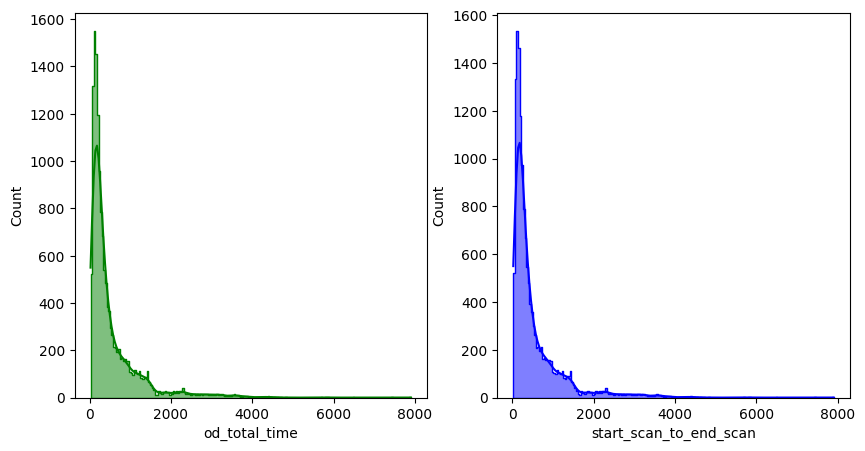

In [726]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram for Total trip time to check for distribution
sns.histplot(df2['od_total_time'], element = 'step', kde = True, color = 'green', label = 'Total Trip time')

plt.subplot(1, 2, 2)
#histogram for start to end scan to check for distribution
sns.histplot(df2['start_scan_to_end_scan'], element = 'step', kde = True, color = 'blue', label = 'Total time start to end scan')

plt.show()

###### QQ Plot for normality

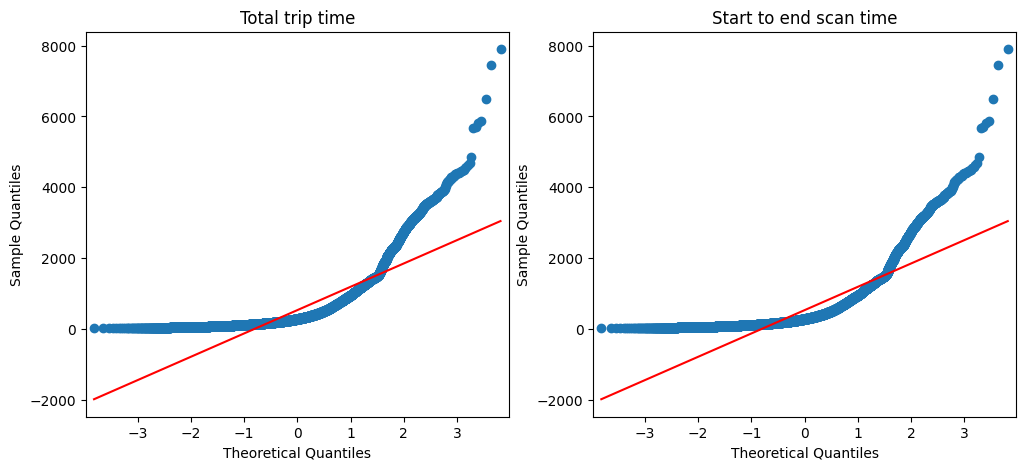

In [727]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)

#plotting the qq plot for Total trip time
sm.qqplot(df2['od_total_time'], line = 's', ax = ax)
plt.title('Total trip time')

ax = fig.add_subplot(122)
#plotting the qq plot for start to scan end time
sm.qqplot(df2['start_scan_to_end_scan'], line = 's', ax = ax)
plt.title('Start to end scan time')
plt.show()

From the above QQ plot data doesn't seem to be following normal distribution.

###### Shapiro wilk test for normality

In [728]:
#taking sample for test for both the columns
total_trip_time = df2['od_total_time'].sample(3000)
start_scan_to_end_scan = df2['start_scan_to_end_scan'].sample(3000)

For Total Trip Time

In [729]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking Total trip time sample and running the test on that
test_stat, p_value = shapiro(total_trip_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

2.9087281833938346e-60
Reject the null hypothesis


For Total start to end scan time

In [730]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking scan start/end sample and running the test on that
test_stat, p_value = shapiro(start_scan_to_end_scan)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.094410720756427e-61
Reject the null hypothesis


From above shapiro test we can say that sample for Total trip time and Time for start to end scan doesn't follow normal distribution

###### Box-cox to transform data to normal

In [731]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_trip_time)
test_stat, p_value = shapiro(transformed1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.9118127270240674e-10
Reject the null hypothesis


In [732]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(start_scan_to_end_scan)
test_stat, p_value = shapiro(transformed2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.125800718312231e-10
Reject the null hypothesis


EVen after applying the box-cox transformation data is not normal, which we can verfiy through the qq plot

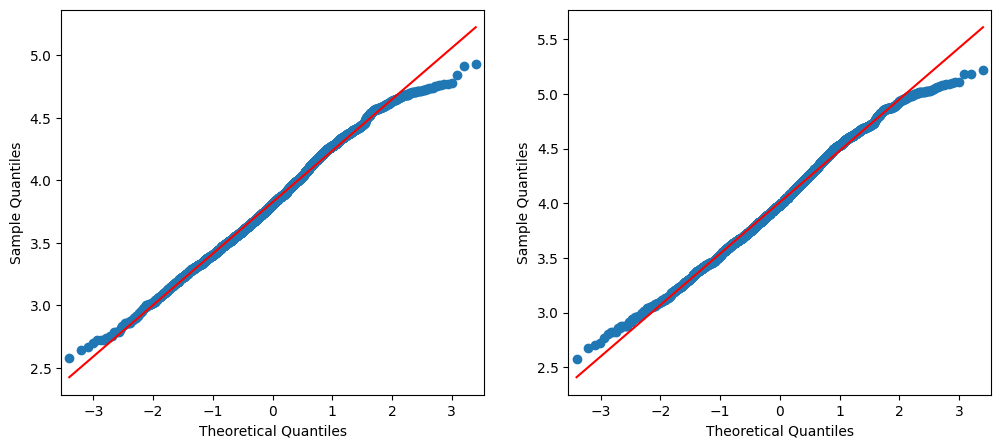

In [733]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed1, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed2, line = 's', ax = ax)
plt.show()

###### Levene test for homegenity of variance

In [734]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(total_trip_time, start_scan_to_end_scan)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.7309687535463244
Accept the null hypothesis


Samples have homogenous variance

As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

##### Hypothesis test - Nonparametric

In [735]:
#performing Mann-whiteney test since the data is not normal

# Null Hypothesis ( H0 ) - Total Trip Time and Start to end scan time are same.
# Alternate Hypothesis ( HA ) - Total Trip Time and start to end scan time are different.
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(total_trip_time, start_scan_to_end_scan)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.6077005313469358
Accept the null hypothesis


Since p-value is > 0.05 we can say that H0 is True, meaning Total Trip Time and Start to end scan time are same.

#### Between aggregated values of Actual time and OSRM time

Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

High level summary

In [736]:
df2[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,161.384018
std,561.396157,271.360995
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


##### Steps

**STEP-1 : Set up Null Hypothesis**

- Null Hypothesis ( H0 ) - Total actual_time aggregated value and OSRM time aggregated value are same.
- Alternate Hypothesis ( HA ) - actual_time aggregated value and OSRM time aggregated value are different.

**STEP-2 : Checking for basic assumpitons for the hypothesis**

- Distribution check using QQ Plot
- Homogeneity of Variances using Lavenes test

**STEP-3: Define Test statistics**
If the assumptions of the T-Test are satisfied, we can proceed with conducting the T-Test for independent samples. Otherwise, we will resort to performing the non-parametric equivalent of the T-Test for independent samples, namely the Mann-Whitney U rank test for two independent samples.

**STEP-4: Compute the p-value and fix value of alpha.**
We set our alpha to be 0.05

**STEP-5: Compare p-value and alpha.**
Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

##### Check for Normality

###### Visual Analysis

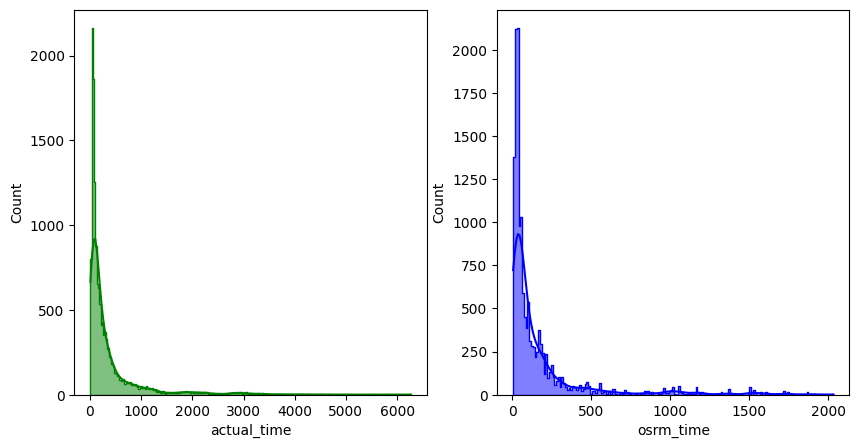

In [738]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram for Total trip time to check for distribution
sns.histplot(df2['actual_time'], element = 'step', kde = True, color = 'green', label = 'actual_time')

plt.subplot(1, 2, 2)
#histogram for start to end scan to check for distribution
sns.histplot(df2['osrm_time'], element = 'step', kde = True, color = 'blue', label = 'osrm_time')

plt.show()

###### QQ Plot for normality

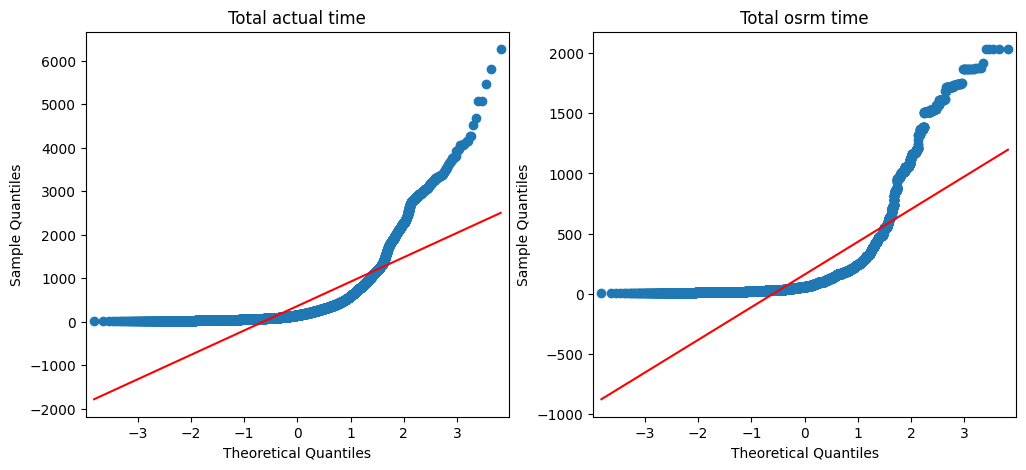

In [802]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)

#plotting the qq plot for Total trip time
sm.qqplot(df2['actual_time'], line = 's', ax = ax)
plt.title('Total actual time')

ax = fig.add_subplot(122)
#plotting the qq plot for start to scan end time
sm.qqplot(df2['osrm_time'], line = 's', ax = ax)
plt.title('Total osrm time')
plt.show()

From the above QQ plot data doesn't seem to be following normal distribution.

###### Shapiro wilk test for normality

In [745]:
#taking sample for test for both the columns
total_actual_time = df2['actual_time'].sample(3000)
total_osrm_time = df2['osrm_time'].sample(3000)

For Total Actual Time

In [746]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking Total trip time sample and running the test on that
test_stat, p_value = shapiro(total_actual_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.045115166904931e-65
Reject the null hypothesis


For Total osrm time

In [747]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking scan start/end sample and running the test on that
test_stat, p_value = shapiro(total_osrm_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

2.7245940544573097e-66
Reject the null hypothesis


From above shapiro test we can say that sample for Total Actual time and osrm time doesn't follow normal distribution

###### Box-cox to transform data to normal

In [748]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_actual_time)
test_stat, p_value = shapiro(transformed1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.0308254643901285e-11
Reject the null hypothesis


In [749]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_osrm_time)
test_stat, p_value = shapiro(transformed2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.125800718312231e-10
Reject the null hypothesis


Even after applying the box-cox transformation data is not normal, which we can verfiy through the qq plot

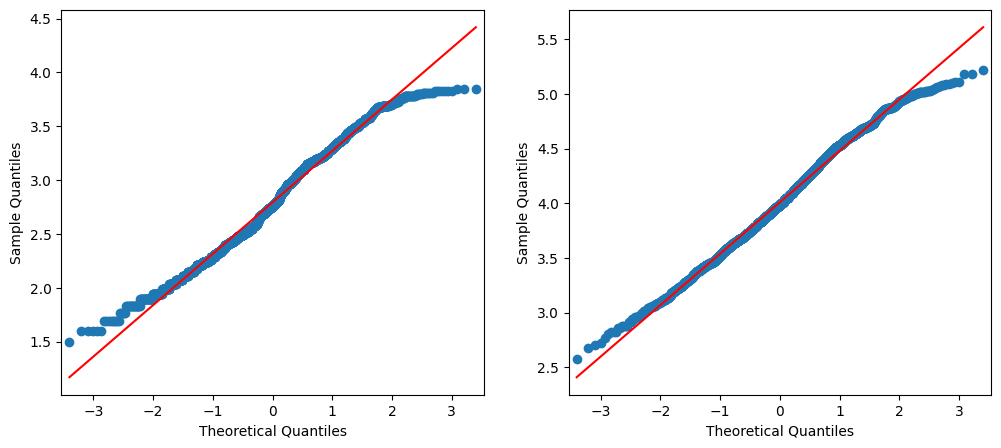

In [750]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed1, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed2, line = 's', ax = ax)
plt.show()

###### Levene test for homegenity of variance

In [751]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(total_actual_time, total_osrm_time)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.7883917095550236e-37
Reject the null hypothesis


Samples don't have homogenous variance

As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

##### Hypothesis test - Nonparametric

In [752]:
#performing Mann-whiteney test since the data is not normal

# Null Hypothesis ( H0 ) - Total Actual Time and Total osrm time are same.
# Alternate Hypothesis ( HA ) - Total Actual Time and Total osrm timr are different.
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(total_actual_time, total_osrm_time)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.4987136032534865e-142
Reject the null hypothesis


Since p-value is less than 0.05 we can say that H0 is rejected, meaning Total actual time and total osrm time are not similar.

#### Between aggregated values of Actual time and Segment actual time

Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

High level summary

In [754]:
df2[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143754,353.951610
std,561.396157,556.320988
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


since mean is almost same, seems like H0 would be true, let's check in detail

##### Steps

**STEP-1 : Set up Null Hypothesis**

- Null Hypothesis ( H0 ) - Total actual_time aggregated value and segment_actual_time aggregated value are same.
- Alternate Hypothesis ( HA ) - Total actual_time aggregated value and segment_actual_time aggregated value are not same.

**STEP-2 : Checking for basic assumpitons for the hypothesis**

- Distribution check using QQ Plot
- Homogeneity of Variances using Lavenes test

**STEP-3: Define Test statistics**
If the assumptions of the T-Test are satisfied, we can proceed with conducting the T-Test for independent samples. Otherwise, we will resort to performing the non-parametric equivalent of the T-Test for independent samples, namely the Mann-Whitney U rank test for two independent samples.

**STEP-4: Compute the p-value and fix value of alpha.**
We set our alpha to be 0.05

**STEP-5: Compare p-value and alpha.**
Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

##### Check for Normality

###### Visual Analysis

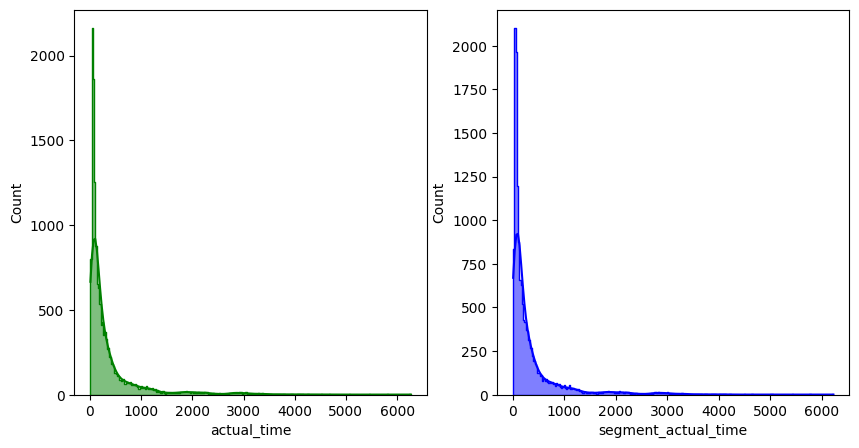

In [758]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram for Total trip time to check for distribution
sns.histplot(df2['actual_time'], element = 'step', kde = True, color = 'green', label = 'actual_time')

plt.subplot(1, 2, 2)
#histogram for start to end scan to check for distribution
sns.histplot(df2['segment_actual_time'], element = 'step', kde = True, color = 'blue', label = 'segment_actual_time')

plt.show()

###### QQ Plot for normality

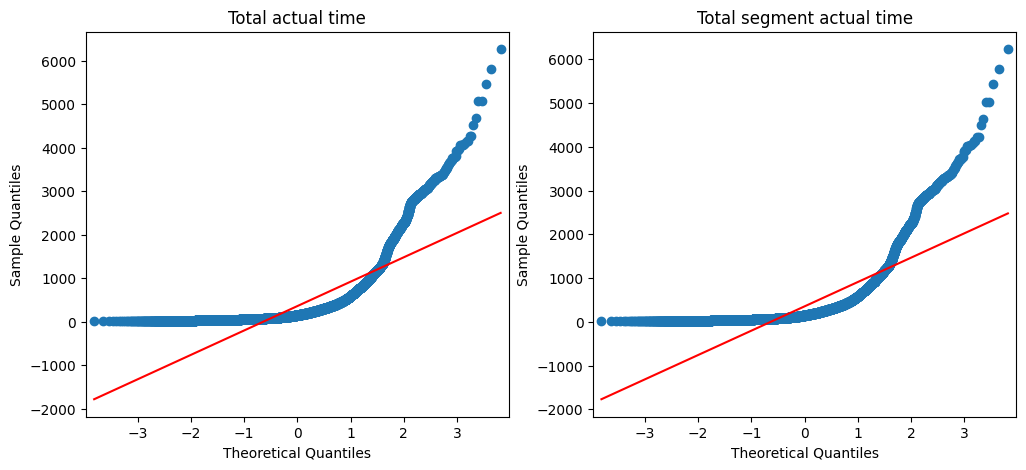

In [760]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))

ax = fig.add_subplot(121)
#plotting the qq plot for Total trip time
sm.qqplot(df2['actual_time'], line = 's', ax = ax)
plt.title('Total actual time')

ax = fig.add_subplot(122)
#plotting the qq plot for start to scan end time
sm.qqplot(df2['segment_actual_time'], line = 's', ax = ax)
plt.title('Total segment actual time')
plt.show()

From the above QQ plot data doesn't seem to be following normal distribution.

###### Shapiro wilk test for normality

In [762]:
#taking sample for test for both the columns
total_actual_time = df2['actual_time'].sample(3000)
total_segment_actual_time = df2['segment_actual_time'].sample(3000)

For Total actual Time

In [763]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking Total trip time sample and running the test on that
test_stat, p_value = shapiro(total_actual_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

7.85911448947202e-65
Reject the null hypothesis


For Total Segment actual time

In [764]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking scan start/end sample and running the test on that
test_stat, p_value = shapiro(total_segment_actual_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

4.14964137645329e-65
Reject the null hypothesis


From above shapiro test we can say that sample for Total Actual time and segment time doesn't follow normal distribution

###### Box-cox to transform data to normal

In [765]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_actual_time)
test_stat, p_value = shapiro(transformed1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.5538992272612984e-12
Reject the null hypothesis


In [766]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_segment_actual_time)
test_stat, p_value = shapiro(transformed2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.125800718312231e-10
Reject the null hypothesis


Even after applying the box-cox transformation data is not normal, which we can verfiy through the qq plot

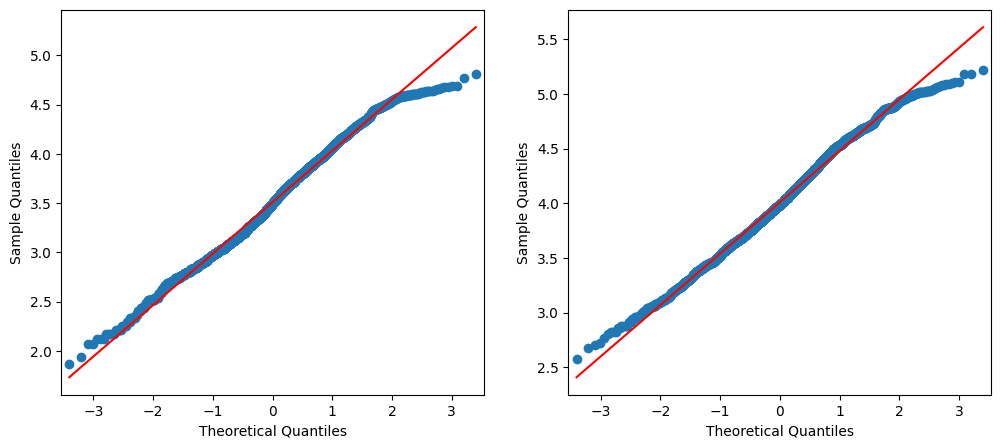

In [767]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed1, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed2, line = 's', ax = ax)
plt.show()

###### Levene test for homegenity of variance

In [768]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(total_actual_time, total_segment_actual_time)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.6579764722386244
Accept the null hypothesis


Samples have homogenous variance

As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

##### Hypothesis test - Nonparametric

In [769]:
#performing Mann-whiteney test since the data is not normal

# Null Hypothesis ( H0 ) - Total Actual Time and Total segment actual time are same.
# Alternate Hypothesis ( HA ) - Total Actual Time and Total segment actual time are not same or they are different.
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(total_actual_time, total_segment_actual_time)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.26131684335816197
Accept the null hypothesis


Since p-value is > 0.05 we can say that H0 is accepeted, meaning Total actual time and total osrm time are similar, which was visible in mean value in initial decribe function output.

#### Between aggregated values of OSRM time and segment OSRM time

Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

High level summary

In [773]:
df2[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.921172
std,271.360995,314.485624
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


since mean 161 vs 181 , seems like H0 might be rejected, but lets see whether statistically it is significant or not. since difference is not big but not small as well.

##### Steps

**STEP-1 : Set up Null Hypothesis**

- Null Hypothesis ( H0 ) - Total osrm_time and segment_osrm_time aggregated value are same.
- Alternate Hypothesis ( HA ) - Total osrm_time and segment_osrm_time aggregated value are same are not same.

**STEP-2 : Checking for basic assumpitons for the hypothesis**

- Distribution check using QQ Plot
- Homogeneity of Variances using Lavenes test

**STEP-3: Define Test statistics**
If the assumptions of the T-Test are satisfied, we can proceed with conducting the T-Test for independent samples. Otherwise, we will resort to performing the non-parametric equivalent of the T-Test for independent samples, namely the Mann-Whitney U rank test for two independent samples.

**STEP-4: Compute the p-value and fix value of alpha.**
We set our alpha to be 0.05

**STEP-5: Compare p-value and alpha.**
Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

##### Check for Normality

###### Visual Analysis

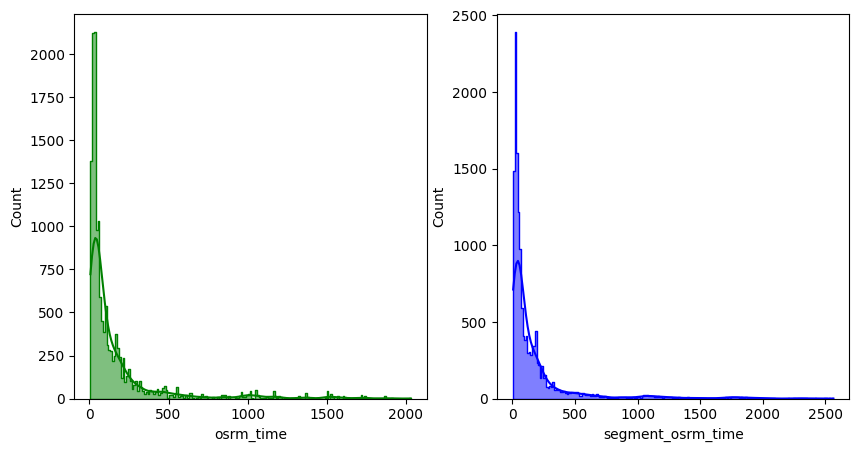

In [772]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram for Total trip time to check for distribution
sns.histplot(df2['osrm_time'], element = 'step', kde = True, color = 'green', label = 'actual_time')

plt.subplot(1, 2, 2)
#histogram for start to end scan to check for distribution
sns.histplot(df2['segment_osrm_time'], element = 'step', kde = True, color = 'blue', label = 'segment_actual_time')

plt.show()

###### QQ Plot for normality

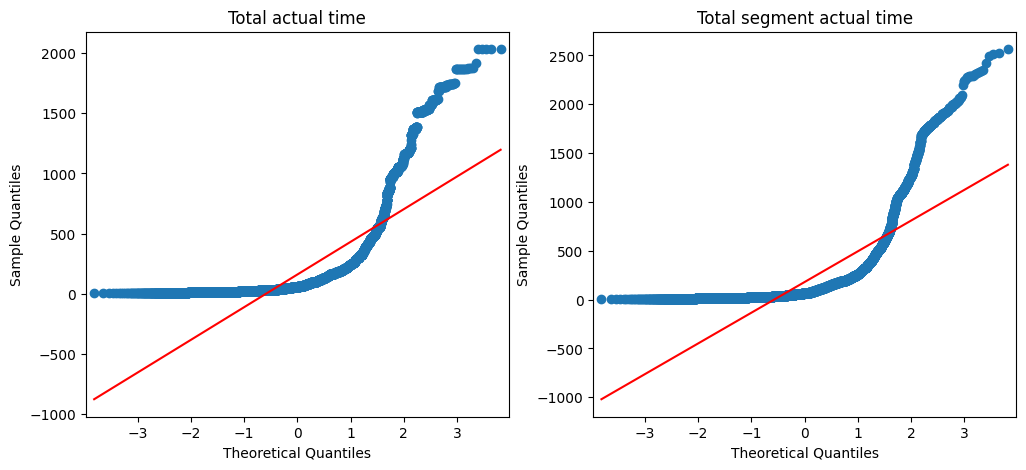

In [774]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))

ax = fig.add_subplot(121)
#plotting the qq plot for Total trip time
sm.qqplot(df2['osrm_time'], line = 's', ax = ax)
plt.title('Total osrm time')

ax = fig.add_subplot(122)
#plotting the qq plot for start to scan end time
sm.qqplot(df2['segment_osrm_time'], line = 's', ax = ax)
plt.title('Total segment osrm time')
plt.show()

From the above QQ plot data doesn't seem to be following normal distribution.

###### Shapiro wilk test for normality

In [781]:
#taking sample for test for both the columns
total_osrm_time = df2['osrm_time'].sample(3000)
total_segment_osrm_time = df2['segment_osrm_time'].sample(3000)

For Total osrm Time

In [782]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking Total trip time sample and running the test on that
test_stat, p_value = shapiro(total_osrm_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.013213406539735e-66
Reject the null hypothesis


For Total segment osrm time

In [783]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking scan start/end sample and running the test on that
test_stat, p_value = shapiro(total_segment_osrm_time)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

9.664489783740285e-67
Reject the null hypothesis


From above shapiro test we can say that sample for Total osrm time and segment osrm time doesn't follow normal distribution

###### Box-cox to transform data to normal

In [787]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_osrm_time)
test_stat, p_value = shapiro(transformed1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

3.128712255273457e-17
Reject the null hypothesis


In [788]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_segment_osrm_time)
test_stat, p_value = shapiro(transformed2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.125800718312231e-10
Reject the null hypothesis


Even after applying the box-cox transformation data is not normal, which we can verfiy through the qq plot

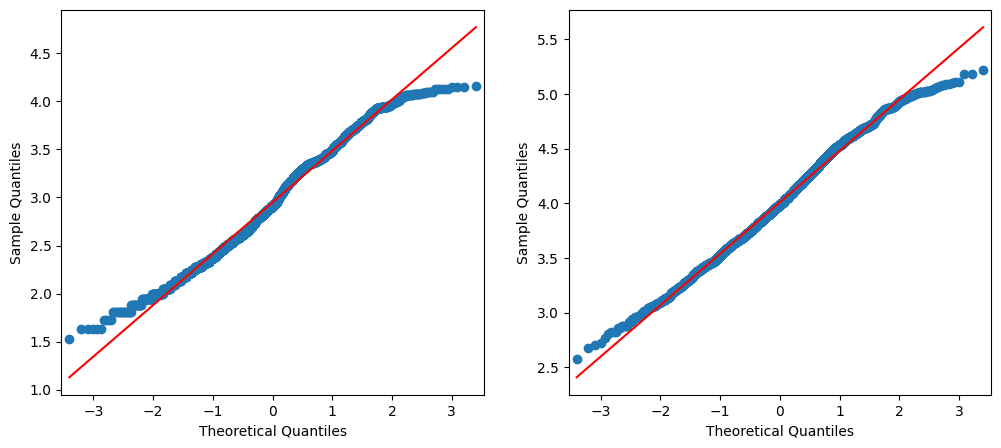

In [789]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed1, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed2, line = 's', ax = ax)
plt.show()

###### Levene test for homegenity of variance

In [790]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(total_osrm_time, total_segment_osrm_time)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.0003509202381226863
Reject the null hypothesis


Samples does't have homogenous variance

As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

##### Hypothesis test - Nonparametric

In [791]:
#performing Mann-whiteney test since the data is not normal

# Null Hypothesis ( H0 ) - Total Actual Time and Total segment actual time are same.
# Alternate Hypothesis ( HA ) - Total Actual Time and Total segment actual time are not same or they are different.
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(total_osrm_time, total_segment_osrm_time)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.0007081520445951718
Reject the null hypothesis


Since p-value is < 0.05 we can say that H0 is rejected, meaning Total osrm time and total segment osrm time are not similar.

#### Between aggregated values of OSRM distance and Segment OSRM distance

Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

High level summary

In [794]:
df2[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344689,223.164000
std,370.395573,416.547252
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.710200
max,2840.081000,3523.632400


since mean 204 vs 223 , seems like H0 might be accepted

##### Steps

**STEP-1 : Set up Null Hypothesis**

- Null Hypothesis ( H0 ) - Total osrm_distance and segment_osrm_distance aggregated value are same.
- Alternate Hypothesis ( HA ) - Total osrm_distance and segment_osrm_distance aggregated value are not same.

**STEP-2 : Checking for basic assumpitons for the hypothesis**

- Distribution check using QQ Plot
- Homogeneity of Variances using Lavenes test

**STEP-3: Define Test statistics**
If the assumptions of the T-Test are satisfied, we can proceed with conducting the T-Test for independent samples. Otherwise, we will resort to performing the non-parametric equivalent of the T-Test for independent samples, namely the Mann-Whitney U rank test for two independent samples.

**STEP-4: Compute the p-value and fix value of alpha.**
We set our alpha to be 0.05

**STEP-5: Compare p-value and alpha.**
Based on p-value, we will accept or reject H0.

- p-val > alpha : Accept H0
- p-val < alpha : Reject H0

##### Check for Normality

###### Visual Analysis

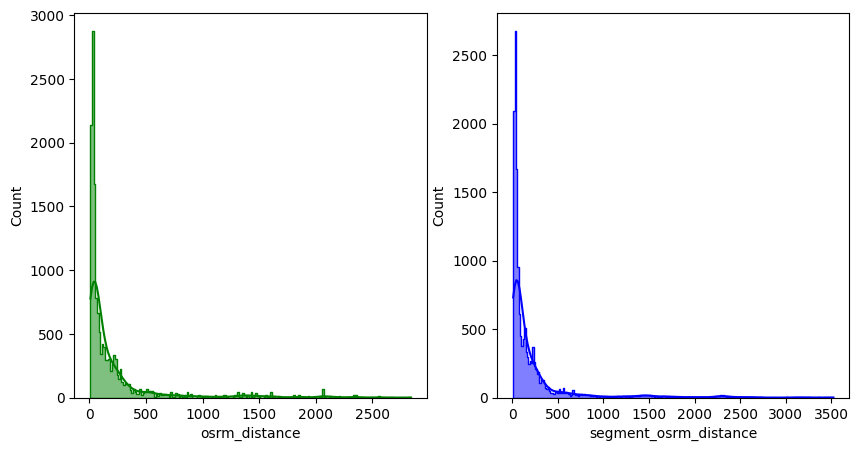

In [797]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram for Total trip time to check for distribution
sns.histplot(df2['osrm_distance'], element = 'step', kde = True, color = 'green', label = 'actual_time')

plt.subplot(1, 2, 2)
#histogram for start to end scan to check for distribution
sns.histplot(df2['segment_osrm_distance'], element = 'step', kde = True, color = 'blue', label = 'segment_actual_time')

plt.show()

###### QQ Plot for normality

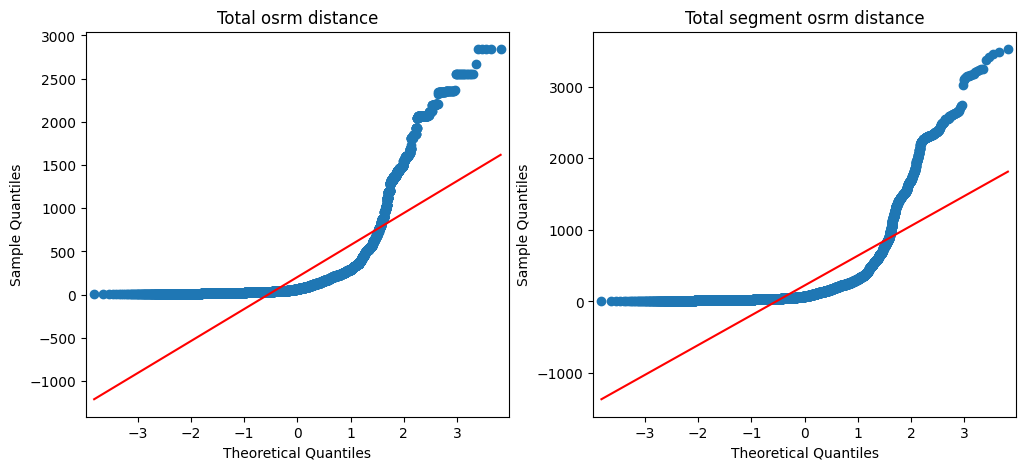

In [798]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))

ax = fig.add_subplot(121)
#plotting the qq plot for Total trip time
sm.qqplot(df2['osrm_distance'], line = 's', ax = ax)
plt.title('Total osrm distance')

ax = fig.add_subplot(122)
#plotting the qq plot for start to scan end time
sm.qqplot(df2['segment_osrm_distance'], line = 's', ax = ax)
plt.title('Total segment osrm distance')
plt.show()

From the above QQ plot data doesn't seem to be following normal distribution.

###### Shapiro wilk test for normality

In [799]:
#taking sample for test for both the columns
total_osrm_distance = df2['osrm_distance'].sample(3000)
total_segment_osrm_distance = df2['segment_osrm_distance'].sample(3000)

For Total osrm Time

In [800]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking Total trip time sample and running the test on that
test_stat, p_value = shapiro(total_osrm_distance)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

9.674626101899342e-68
Reject the null hypothesis


For Total segment osrm time

In [801]:
#H0- assuming sample follows normal distribution
#Ha -Reject H0

#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking scan start/end sample and running the test on that
test_stat, p_value = shapiro(total_segment_osrm_distance)


print(p_value)
#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

7.27504526963356e-68
Reject the null hypothesis


From above shapiro test we can say that sample for Total osrm distance and segment osrm distance doesn't follow normal distribution

###### Box-cox to transform data to normal

In [803]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_osrm_distance)
test_stat, p_value = shapiro(transformed1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.120070861158217e-21
Reject the null hypothesis


In [804]:
from scipy.stats import boxcox

transformed1, best_lambda = boxcox(total_segment_osrm_distance)
test_stat, p_value = shapiro(transformed2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.125800718312231e-10
Reject the null hypothesis


Even after applying the box-cox transformation data is not normal, which we can verfiy through the qq plot

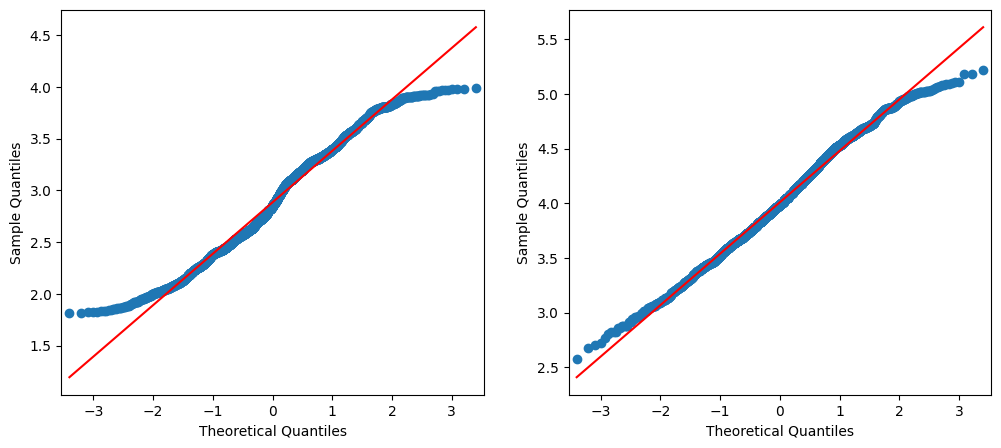

In [805]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed1, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed2, line = 's', ax = ax)
plt.show()

###### Levene test for homegenity of variance

In [807]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(total_osrm_distance, total_segment_osrm_distance)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.004595711687792748
Reject the null hypothesis


Samples does't have homogenous variance

As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

##### Hypothesis test - Nonparametric

In [809]:
#performing Mann-whiteney test since the data is not normal

# Null Hypothesis ( H0 ) - Total osrm distance and Total segment osrm distance are same.
# Alternate Hypothesis ( HA ) - Total osrm distance and Total segment osrm distance are not same.
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(total_osrm_distance, total_segment_osrm_distance)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.0022543784321766877
Reject the null hypothesis


Since p-value is < 0.05 we can say that H0 is rejected, meaning Total osrm distance and total osrm segment distance are not similar.

### Outlier Detection

Find outliers in the numerical variables (we might find outliers in almost all the variables), and check it using visual analysis

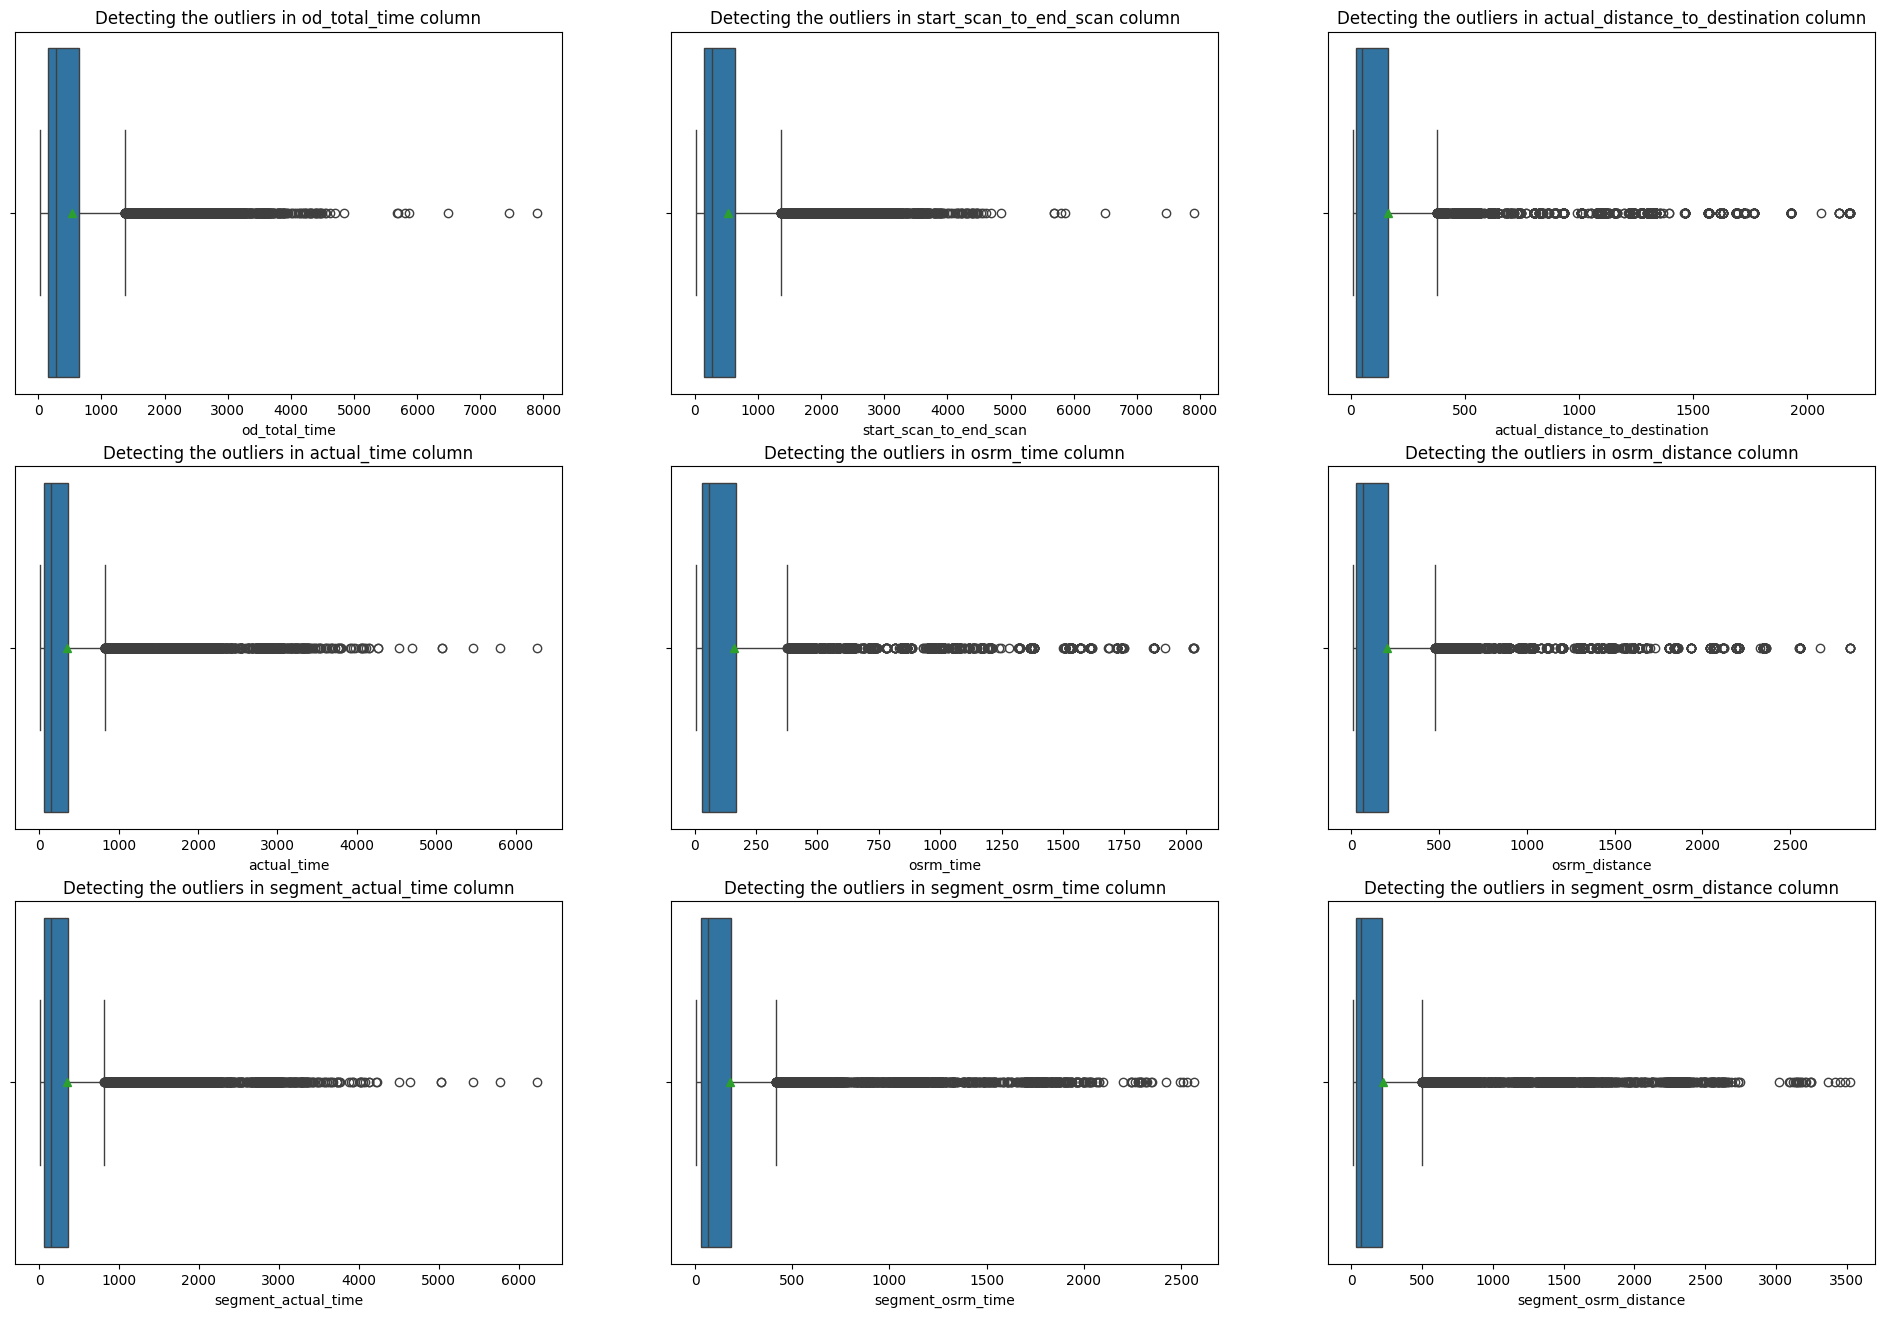

In [827]:
#taking all the numerical columns for the outlier detection which are he
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
count = 1
plt.figure(figsize = (24, 16))
for i in numerical_columns:
  plt.subplot(3, 3 ,count)
  sns.boxplot(x = df2[i], data = df2, showmeans = True) #plotting the box plot with mean showing on box plot
  plt.title(f'Detecting the outliers in {i} column', size = 12)
  plt.plot()
  count += 1

In [829]:
#Detecting outliers

for i in numerical_columns:
  Q1 = np.quantile(df2[i], 0.25)
  Q3 = np.quantile(df2[i], 0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_outliers = df2.loc[( df2[i] < lower_bound) | (df2[i] > upper_bound)] #this df will represent values with outliers only.

  print(f'Column :{i}')
  print(f'Q1 : {Q1}')
  print(f'Q3 : {Q3}')
  print(f'IQR : {IQR}')
  print(f'lower_bound : {lower_bound}')
  print(f'upper_bound : {upper_bound}')
  print(f'Number of outliers : {df_outliers.shape[0]}')
  print('----------------------------------')

Column :od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
lower_bound : -582.4750000000001
upper_bound : 1370.605
Number of outliers : 1266
----------------------------------
Column :start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
lower_bound : -583.0
upper_bound : 1369.0
Number of outliers : 1267
----------------------------------
Column :actual_distance_to_destination
Q1 : 22.83723905859321
Q3 : 164.58320763841138
IQR : 141.74596857981817
lower_bound : -189.78171381113404
upper_bound : 377.2021605081386
Number of outliers : 1449
----------------------------------
Column :actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
lower_bound : -387.5
upper_bound : 824.5
Number of outliers : 1643
----------------------------------
Column :osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
lower_bound : -179.5
upper_bound : 376.5
Number of outliers : 1517
----------------------------------
Column :osrm_distance
Q1 : 30.8192
Q3 : 208.475
IQR : 177.6558
lower_bound : -235.6645
upper_bound 

### Outlier Treatment

Now that we know there are significant outliers in the data (upto 1643 in segment_actual_time), we can filter out the outliers from dataframe.

Handing the outliers using the IQR method.

In [839]:
# Select only numeric columns
df2_numeric = df2.select_dtypes(include=[float, int])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df2_numeric.quantile(0.25)
Q3 = df2_numeric.quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
df2_filtered = df2[~((df2_numeric < lower_bound) | (df2_numeric > upper_bound)).any(axis=1)]

#print the no of row before and after outlier treatment
print(f'Number of rows before outlier treatment : {df2.shape[0]}')
print(f'Number of rows after outlier treatment : {df2_filtered.shape[0]}')
print('No of rows removed during outier treatment: ', df2.shape[0] - df2_filtered.shape[0])

Number of rows before outlier treatment : 14817
Number of rows after outlier treatment : 12759
No of rows removed during outier treatment 2058


### Encoding

Do one-hot encoding of categorical variables (like route_type)

### Normalisation/ Standardization

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

## Business Insights

### Recommendations